# Homework 2: Beauty and the Labor Market
## Statistical Models
## Group 16

#### Group Members:<br>
Alexandre Bredillot<br>
Moritz Lumma<br>
Cristina Gricianii<br>
Tanushree Sharma<br>
Francesco Cimarra

In [ ]:
# Importing libraries and reading the excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import skew, kurtosis

df = pd.read_excel("beauty.xlsx")
df.head()

,wage,lwage,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,educ
0,5.73,1.745715,30,4,0,1,0,1,1,0,0,1,1,14
1,4.28,1.453953,28,3,0,1,0,1,1,1,0,1,0,12
2,7.96,2.074429,35,4,0,1,0,1,0,0,0,1,0,10
3,11.57,2.448416,38,3,0,1,0,0,1,0,1,0,1,16
4,11.42,2.435366,27,3,0,1,0,0,1,0,0,1,0,16


## Question 1: Data Exploration

### Question 1.1

In [24]:
vars = ["wage", "lwage", "educ", "exper", "looks"]
df[vars].describe()
print("Descriptive Statistics:")
print(df[vars].describe())
for col in ["wage", "lwage"]:
    print(f"{col}= Skewness: {df[col].skew()}, Kurtosis: {df[col].kurt()}")

Descriptive Statistics:
              wage        lwage         educ        exper        looks
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000
mean      6.306690     1.658800    12.563492    18.206349     3.185714
std       4.660639     0.594508     2.624489    11.963485     0.684877
min       1.020000     0.019803     5.000000     0.000000     1.000000
25%       3.707500     1.310357    12.000000     8.000000     3.000000
50%       5.300000     1.667705    12.000000    15.000000     3.000000
75%       7.695000     2.040570    13.000000    27.000000     4.000000
max      77.720000     4.353113    17.000000    48.000000     5.000000
wage= Skewness: 4.8192044939496546, Kurtosis: 51.22120116313635
lwage= Skewness: 0.08333412347927915, Kurtosis: 0.4314718014935921


### Question 1.2

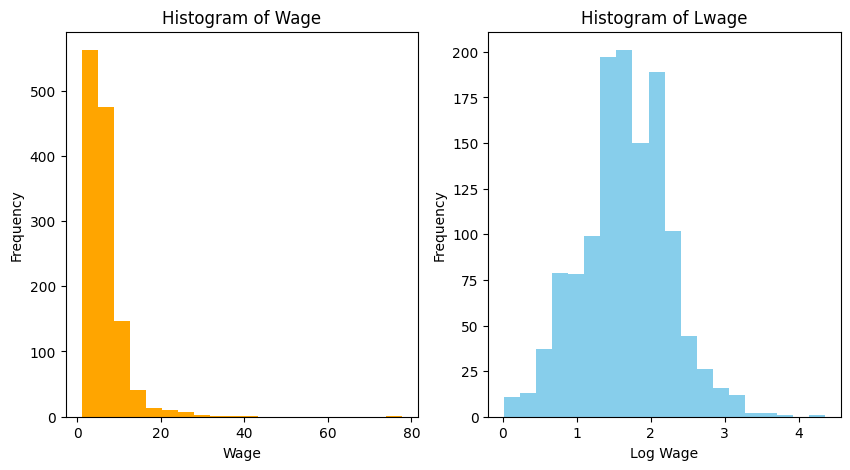

In [25]:
#Histograms
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(df["wage"].dropna(), bins=20, color='orange')
plt.title("Histogram of Wage")
plt.xlabel("Wage")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df["lwage"].dropna(), bins=20, color='skyblue')
plt.title("Histogram of Lwage")
plt.xlabel("Log Wage")
plt.ylabel("Frequency")

plt.show()

Skewness and Kurtosis are used to describe the spread and height of a normal distribution.

The wage histogram is highly right-skewed (skewness approx 4.82) and has extremely high kurtosis (approx 51.22). It creates a right tail, meaning most people earn relatively low wages, with a few people earning high wages. The wage histogram is very asymmetric and has outliers.

The lwage histogram looks more balanced and bell-shaped. It spreads out the lower values, reducing skewness, which makes it more symmetric and also makes the distribution more normal. The skewness is 0.08, which is almost zero; that said, skewness tell us that the distribution is nearly symmetric. On the other hand, kurtosis is 0.43, which is also close to zero, meaning the tails are not too heavy.

In linear regressions, the dependent variable (in this case Frequency) should be approximately normally distributed and homoskedastic. From the histograms above, we can easily see that the logarithm of wage fixes the problem that the variable Wage presents: it is heavily skewed and it has extreme outliers. Therefore, the Lwage is more suitable as the dependent variable in linear regression analysis because it makes the distribution more symmetric and normal, i.e, the relationship between variables is closer to linear. Therefore, it gives more reliable and interpretable results. Furthermore, the regression residuals (errors) will also behave better.

## Question 2: Simple Linear Regression

In [26]:
simple_model = smf.ols("lwage ~ looks", data=df).fit()
print(simple_model.summary())

b_looks_simple = simple_model.params["looks"]
sterr_looks_simple = simple_model.bse["looks"]
t_looks_simple = simple_model.tvalues["looks"]
p_looks_simple = simple_model.pvalues["looks"]

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.349
Date:                Sat, 25 Oct 2025   Prob (F-statistic):             0.0372
Time:                        12:48:06   Log-Likelihood:                -1130.0
No. Observations:                1260   AIC:                             2264.
Df Residuals:                    1258   BIC:                             2274.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4965      0.080     18.798      0.0

### Question 2.1

The estimated coefficients are: 
$$
\hat{\beta}_1 = 0.0510 \quad \hat{\beta}_0 = 1.4965
$$

The standard error SE is:
$$
\text{SE}(\hat{\beta}_1) = 0.024
$$

The coefficient of determination is: R-squared = 0.003

### Question 2.2
It implies that, on average, a one-unit increase in attractiveness is associated with about a 5.1% higher wage, suggesting a small but statistically significant positive relationship between attractiveness and wages.

### Question 2.3

#### Hypothesis Test for the Effect of Physical Attractiveness on Wages


#### Step 1: State the Hypotheses

$$
H_0: \beta_1 = 0 \quad \text{(physical attractiveness has no effect on wages)}
$$
$$
H_a: \beta_1 \neq 0 \quad \text{(physical attractiveness affects wages)}
$$

#### Step 2: Test Statistic

From the regression output:

$$
\hat{\beta}_1 = 0.0510, \quad \text{SE}(\hat{\beta}_1) = 0.024, \quad t = 2.085, \quad p = 0.037
$$

#### Step 3: Decision Rule

At a significance level of $ \alpha = 0.05 $:

$$
p = 0.037 < 0.05 \implies \text{Reject } H_0
$$

#### Step 4: Conclusion

There is statistically significant evidence at the 5% level that physical attractiveness ${looks}$ has an effect on wages.

$$
\boxed{p = 0.037 < 0.05 \Rightarrow \text{Reject } H_0. \text{ Physical attractiveness significantly affects wages.}}
$$

## Question 3: Multiple Linear Regression 

### Question 3.1
#### Regression Results for Multiple Linear Regression Model 

$$
lwage=β_0​+β_1​looks+β_2​educ+β_3​exper+β_4​female+β_5​union+β_6​married+β_7​goodhlth+β_8​black+β_9​service+ε

In [27]:
formula = "lwage ~ looks + female + married + goodhlth + black + union + educ + exper + service"
multi_model = smf.ols(formula, data=df).fit()
print(multi_model.summary())

# to save the coefficients and stats from the multiple regression model for answers
b_looks_multi = multi_model.params["looks"]
se_looks_multi = multi_model.bse["looks"]
t_looks_multi = multi_model.tvalues["looks"]
p_looks_multi = multi_model.pvalues["looks"]
conf_int_looks_multi = multi_model.conf_int().loc["looks"]  # 95% CI

print(conf_int_looks_multi)

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     81.95
Date:                Sat, 25 Oct 2025   Prob (F-statistic):          2.20e-119
Time:                        12:48:06   Log-Likelihood:                -839.97
No. Observations:                1260   AIC:                             1700.
Df Residuals:                    1250   BIC:                             1751.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2489      0.111      2.234      0.0

### Question 3.2
#### Comparison Between 2 Estimated Coefficients

In [28]:
print(f"The estimated coefficient for looks in the simple regression model is {round((b_looks_simple), 4)}")
print(f"The estimated coefficient for looks in the multiple regression model is {round((b_looks_multi), 4)}")

The estimated coefficient for looks in the simple regression model is 0.051
The estimated coefficient for looks in the multiple regression model is 0.0535


The simple regression model in question 2 estimates how looks abd lwage move together without accounting for the other explanatory variables. On the other hand, the multiple regression model estimates the effect of looks while holding the other variables (female, married, goodhlth, black, union, educ, exper, and service) constant.

In the simple regression model the coefficient is 0.051. After adding the other variable that may have an impact on a person's wage and attractiveness, the estimated coefficient on looks becomes 0.0535. 

This change tells us that the other variables have indeed an impact on a person's wage and if they are omitted, we have a biased coefficient, as we left out relevant variables that are correlated with both physical attractiveness (looks) and the variable of natural log of wage (lwage).

We can conclude that the simple regression model is biased downward by 0.0025.

### Question 3.3
#### Does Physical Attractiveness Still Have a Statistically Significant Effect on Wages?

$$
H_0: \beta_1 = 0 \quad \text{(physical attractiveness has no effect on wages)}
$$
$$
H_a: \beta_1 \neq 0 \quad \text{(physical attractiveness affects wages)}
$$

If p < 0.05 → reject H0 at 5% significance → looks is statistically significant.

If p ≥ 0.05 → do not reject H0 → cannot claim looks has a statistically significant effect.

In [29]:
alpha = 0.05
if p_looks_multi < alpha:
    print(f"P-value of the multiple regression model equals {round(p_looks_multi,4)}, which is smaller than 0.05; therefore, we reject H0: ")
else:
    print(f"We cannot reject H0")

P-value of the multiple regression model equals 0.0074, which is smaller than 0.05; therefore, we reject H0: 


After controlling for variables such as education, experience, gender, union membership, marital status, health, race, and service industry, the coefficient on looks is 0.0535, with a standard error of 0.020, and p-value of 0.0074.

Since 0.0074 < 0.05, at the 5% significance level we reject the null hypothesis.

Conclusion: Physical attractiveness appears to have a statistically significant positive effect on the variable natural log of wage (lwage).

## Question 4: Exploring Non-linear Relationships and Interactions

### Question 4.1

##### Non-linearity of the experiment

In [30]:
df["exper2"] = df["exper"]**2
formula2 = "lwage ~ looks + female + married + goodhlth + black + union + educ + exper + exper2 + service"

$$
lwage=β_0​+β_1​looks+β_2​educ+β_3​exper+β_3​exper^2+β_5​female+β_6​union+β_7​married+β_8​goodhlth+β_9​black+β_{10}​service+ε

In [31]:
multi_model2 = smf.ols(formula2, data=df).fit()

# to save the coefficients and stats from the multiple regression model for answers
b_looks_multi2 = multi_model2.params["looks"]
se_looks_multi2 = multi_model2.bse["looks"]
t_looks_multi2 = multi_model2.tvalues["looks"]
p_looks_multi2 = multi_model2.pvalues["looks"]
conf_int_looks_multi2 = multi_model2.conf_int().loc["looks"]  # 95% CI


df_resid = multi_model2.df_resid
p_value_looks_manual = 2 * (1 - stats.t.cdf(abs(t_looks_multi2), df=df_resid))

print(f"t = {t_looks_multi2:.3f}, p = {p_value_looks_manual:.4f}")
print(f"The estimated coefficient for looks in the multiple regression model using the experience linearility control is {round((b_looks_multi2), 4)}")

t = 2.843, p = 0.0045
The estimated coefficient for looks in the multiple regression model using the experience linearility control is 0.0558


After including the squared term of experience, the estimated coefficient for looks remains positive (β̂ = 0.0558) and statistically significant (t = 2.843, p = 0.0045).
This means that, even after accounting for the diminishing effect of experience on wages, physical attractiveness continues to have a positive impact on earnings.
On average, a one-unit increase in beauty rating is associated with approximately a 5.6% increase in hourly wages.

### Question 4.2
#### Interaction between beauty and gender

In [32]:
df["male"] = 1- df["female"]
df["looksMale"] = df["looks"] * df["male"]

formula3 = "lwage ~ looks + female + looksMale + married + goodhlth + black + union + educ + exper + exper2 + service"

$$
lwage=β_0​+β_1​looks+β_2​educ+β_3​exper+β_3​exper^2+β_5​female+β_6​union+β_7​married+β_8​goodhlth+β_9​black+β_{10}​service+β_{11}looksMale+ε

In [33]:
model_interaction = smf.ols(formula3, data=df).fit()

# Extract coefficient and stats for 'looks'
b_looks_interaction = model_interaction.params["looks"]
se_looks_interaction = model_interaction.bse["looks"]
t_looks_interaction = model_interaction.tvalues["looks"]
p_looks_interaction = model_interaction.pvalues["looks"]
conf_int_looks_interaction = model_interaction.conf_int().loc["looks"]

df_resid = model_interaction.df_resid
p_value_looks_interaction = 2 * (1 - stats.t.cdf(abs(t_looks_interaction), df=df_resid))

print(f"The estimated coefficient for looks in the multiple regression model with exper² and interaction is {b_looks_interaction:.4f}")
print(f"t = {t_looks_interaction:.3f}, p = {p_value_looks_interaction:.4f}")
print(f"95% CI: [{conf_int_looks_interaction[0]:.4f}, {conf_int_looks_interaction[1]:.4f}]")

print(model_interaction.summary())

The estimated coefficient for looks in the multiple regression model with exper² and interaction is 0.0861
t = 2.733, p = 0.0064
95% CI: [0.0243, 0.1480]
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     72.71
Date:                Sat, 25 Oct 2025   Prob (F-statistic):          6.85e-126
Time:                        12:48:06   Log-Likelihood:                -820.16
No. Observations:                1260   AIC:                             1664.
Df Residuals:                    1248   BIC:                             1726.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|  

#### Is there a statistically significant difference of the beauty variable for men compared to women?

$$
H_0: \beta_{11} = 0 \quad \text{(no difference in the beauty effect between men and women)}
$$
$$
H_a: \beta_{11} \neq 0 \quad \text{(there is a difference in the beauty effect between men and women)}
$$

If p < 0.05 → reject H0 at 5% significance → the beauty premium differs significantly between men and women.

If p ≥ 0.05 → do not reject H0 → the effect of beauty on wages is not significantly different between men and women.

p = 0.219 for looksMale, wich is greater than 0.05; therefore, we cannot reject the null hypothesis. As p is greater than 0.05, we can conclude that there is no statistically significant difference in the beauty effect between men and women.

However, the estimated coefficient for looks is 0.0861 and p-value is 0.0064, which indicates that attractiveness has a positive and statistically significant effect on Lwage for women. On the other hand, as discussed above, the coefficient of the interaction term looksMale is -0.049 with p-value = 0.219, which means that the difference between men and women in the beauty effect is not statistically significant at the 5% level.

Therefore, while beauty significantly increases wages for women, we cannot conclude that this effect is different for men, in a significant manner.

## Question 5: Discussion on the Limitations of the Analysis
### Question 5.1
#### Test for the homoskedasticity assumption

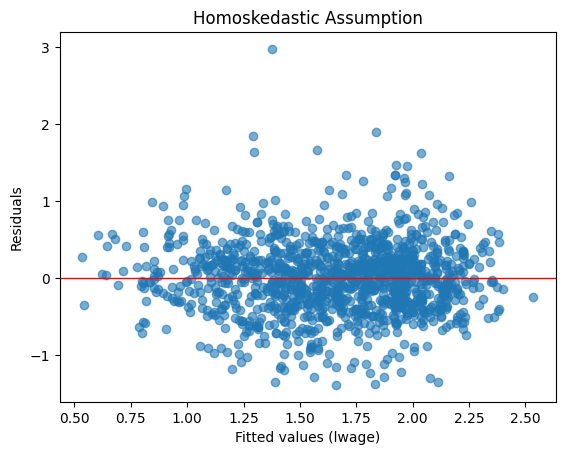

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     85.77
Date:                Sat, 25 Oct 2025   Prob (F-statistic):          4.41e-144
Time:                        13:16:53   Log-Likelihood:                -820.16
No. Observations:                1260   AIC:                             1664.
Df Residuals:                    1248   BIC:                             1726.
Df Model:                          11                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1873      0.130      1.436      0.1

In [41]:
plt.scatter(model_interaction.fittedvalues, model_interaction.resid, alpha=0.6)
plt.axhline(0, color="red", lw=1)
plt.xlabel("Fitted values (lwage)")
plt.ylabel("Residuals")
plt.title("Homoskedastic Assumption")
plt.show()

# Estimation the final multiple linear regression with heteroskedastic-robust covariance 
model_interaction_HC0 = smf.ols(model_interaction.model.formula, data=df).fit(cov_type="HC0")

print(model_interaction_HC0.summary())

Do we reject homoskedasticity? 

No. The residuals–vs–fitted cloud shows a roughly constant vertical spread across fitted: $$\widehat{y}$$

On visual grounds, we do not reject homoskedasticity $$\big(\mathrm{Var}(\varepsilon_i \mid X) \approx \sigma^2\big)$$


HC0 re-estimate — does it change coefficients?
From our Question 4.2 OLS Regression Results
the estimated coefficient for looks is 0.0861 and p-value is 0.0064
the coefficient of the interaction term looksMale is -0.049 with p-value = 0.219

From our Question 5.1 OLS Regression Results, both terms' coeffiecients are exactly the same. For the rest of coefficients, the output is also unchanged.

On the other hand, standard errors (SEs) and p-values slightly change. The HC0 re-estimate slightly increased the p-values, but the main conclusions remain unchanged.
  - looks remains significant at 5% under HC0 (p-value stays < 0.05).  
  - looksMale remains not significant (p-value stays > 0.05).  

So, based on the plot we do not reject homoskedasticity, and the HC0 check confirms that inference for looks and looksMale does not change.


### Question 5.2

Even after controlling for education, experience, gender, union status, health, and other observable factors, there may still be unobserved variables correlated with both attractiveness and wages.  

A plausible omitted factor is the industry in which the individual opperates. Certain jobs (for example, sales, public relations, or entertainment) reward physical appearance more than others (like manufacturing or IT). In these industries, employees are often selected or promoted partly based on their appearance, as it can influence customer relations or company image. 

In such industries, employees are hired on an additional factor: physical appearance. This means that from the start, the population we are testing is biased. If more attractive individuals are disproportionately represented in such industries, part of the observed "beauty premium" actually reflects industry effects, which is a variable we did not test for in our models.

This violates the exogeneity assumption of the classical linear regression model, leading to the omitted variable bias:

$$
E[\varepsilon_i \mid X] = 0
$$

When this assumption is violated, the error term is correlated with the explanatory variable looks, which makes the estimated coefficient for attractiveness biased and inconsistent.